In [1]:
import json
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


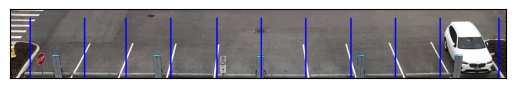

In [2]:
img = cv2.imread("floor5_crop.jpg")

with open("coordinates.json", "r") as f:
    data = json.load(f)

img_mod = img.copy()
for x, count in data["x"]:
    cv2.line(img_mod, (x, data["y_min"]), (x, data["y_max"]), (255, 0, 0), 10)

plt.imshow(cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()


In [3]:
model = YOLO("yolov8n.pt")


In [4]:
results = model(img)



0: 96x640 1 truck, 1 boat, 77.3ms
Speed: 2.0ms preprocess, 77.3ms inference, 2.0ms postprocess per image at shape (1, 3, 96, 640)


In [5]:
results[0]


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [6]:
results[0].boxes


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7., 8.])
conf: tensor([0.3596, 0.3471])
data: tensor([[3.2907e+03, 9.0377e+01, 3.6814e+03, 4.9510e+02, 3.5958e-01, 7.0000e+00],
        [3.2909e+03, 8.9651e+01, 3.6817e+03, 4.9449e+02, 3.4708e-01, 8.0000e+00]])
id: None
is_track: False
orig_shape: (523, 3767)
shape: torch.Size([2, 6])
xywh: tensor([[3486.0723,  292.7394,  390.6619,  404.7256],
        [3486.2888,  292.0712,  390.8257,  404.8399]])
xywhn: tensor([[0.9254, 0.5597, 0.1037, 0.7739],
        [0.9255, 0.5585, 0.1037, 0.7741]])
xyxy: tensor([[3290.7412,   90.3766, 3681.4031,  495.1023],
        [3290.8760,   89.6512, 3681.7017,  494.4911]])
xyxyn: tensor([[0.8736, 0.1728, 0.9773, 0.9467],
        [0.8736, 0.1714, 0.9774, 0.9455]])

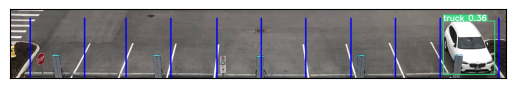

In [7]:
img_pred = results[0].plot()
for x, count in data["x"]:
    cv2.line(img_pred, (x, data["y_min"]), (x, data["y_max"]), (255, 0, 0), 10)

plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()


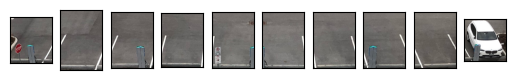

In [8]:
lots = [None] * 10

for i in range(len(data["x"])-1):
    crop = img[data["y_min"]:data["y_max"], data["x"][i][0]:data["x"][i+1][0]]
    lots[i] = crop

for i in range(len(lots)):
    plt.subplot(1, len(data["x"])-1, i+1)
    plt.imshow(cv2.cvtColor(lots[i], cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
plt.show()
    

In [9]:
results = model.predict(lots)



0: 640x640 1 stop sign, 1: 640x640 (no detections), 2: 640x640 (no detections), 3: 640x640 (no detections), 4: 640x640 (no detections), 5: 640x640 (no detections), 6: 640x640 (no detections), 7: 640x640 (no detections), 8: 640x640 (no detections), 9: 640x640 1 car, 1807.3ms
Speed: 8.9ms preprocess, 180.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
lots_occu = [False] * 10

for i in range(len(results)):
    r = results[i]
    for j in range(len(r.boxes.cls)):
        clss = r.boxes.cls[j]
        xywhn = r.boxes.xywh[j]
        # 2:car, 3:motorcycle, 5:bus, 7:truck
        if (clss==2 or clss==3 or clss==5 or clss==7) and xywhn[2]*xywhn[3] > 0.8:
            lots_occu[i] = True
            break

lots_occu


[False, False, False, False, False, False, False, False, False, True]

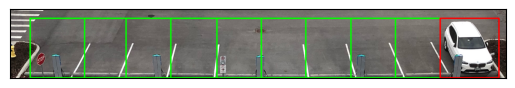

In [11]:
img_occu = img.copy()

for i in range(len(lots_occu)):
    if lots_occu[i] == True:
        cv2.rectangle(img_occu, (data["x"][i][0], data["y_min"]), (data["x"][i+1][0], data["y_max"]), (0, 0, 255), 10)
    else:
        cv2.rectangle(img_occu, (data["x"][i][0], data["y_min"]), (data["x"][i+1][0], data["y_max"]), (0, 255, 0), 10)

plt.imshow(cv2.cvtColor(img_occu, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()
